### Student Information
Name:毛胤絜

Student ID:s113062596

GitHub ID:maomao0800


---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [2]:
### Begin Assignment Here
import pandas as pd
df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
print("dataset:")
df

dataset:


sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1500 rows x 2 columns]

In [3]:
categories=df['sentiment'].unique()
print("有缺失值的entry")
df[df['sentiment'].isnull() | df['comment'].isnull()] #輸出有缺失值的entry

有缺失值的entry


Empty DataFrame
Columns: [sentiment, comment]
Index: []

In [4]:
print("有重複元素的entry數=",sum(df.duplicated()))
df.drop_duplicates(keep=False, inplace=True) # 刪除所有重複的entry

有重複元素的entry數= 1


In [5]:
print(df.sentiment.value_counts())

sentiment
nostalgia        750
not nostalgia    748
Name: count, dtype: int64


In [6]:
import spacy
nlp = spacy.load("en_core_web_sm")
df['unigrams'] = df['comment'].apply(lambda x: [token.text for token in nlp(x)]) #分詞

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.comment) #learn the vocabulary and return document-term matrix

此為前20多的詞的在總詞彙量前20的row中的分布
並且前10個row為'nostalgia',後10個row為'not nostalgia'
可以看出在分布上稍微有點規律，同一個詞彙在不同的category下可以被稍微分類


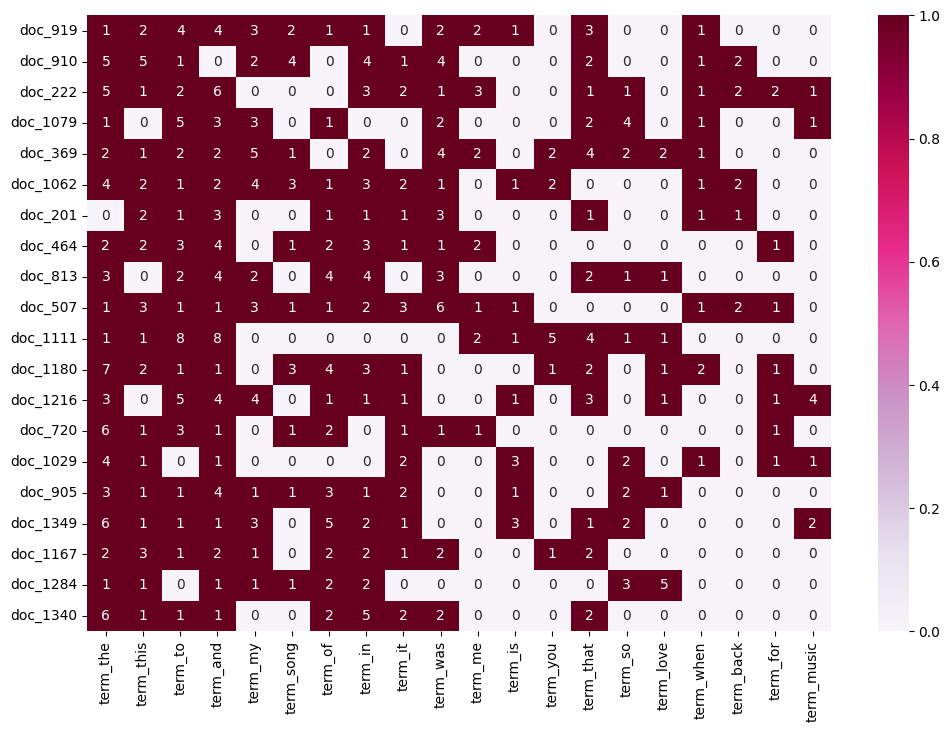

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

row_sums = np.sum(df_counts, axis=1)
column_sums = np.sum(df_counts, axis=0)

column_sums_array = np.array(column_sums).flatten()
column_sums_series = pd.Series(column_sums_array)
top_20_column_index = column_sums_series.nlargest(20).index.tolist()
df_counts_df = pd.DataFrame(df_counts.toarray())
df_counts_df['row_sums'] = row_sums  # 計算row_sums並統計到各個row
df_counts_df['sentiment'] = df['sentiment'].values  

top_10_row_index1 = df_counts_df[df_counts_df['sentiment'] == 'nostalgia'].nlargest(10, 'row_sums').index #字數最多的前15個nostalgia
top_10_row_index2 = df_counts_df[df_counts_df['sentiment'] == 'not nostalgia'].nlargest(10, 'row_sums').index #字數最多的前15個not nostalgia
top_20_row_index = np.concatenate([top_10_row_index1, top_10_row_index2])
top_20_row_index = np.array(top_20_row_index).flatten()

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[top_20_column_index]]
plot_y = ["doc_" + str(i) for i in list(df.index[top_10_row_index1.tolist()])] + ["doc_" + str(i) for i in list(df.index[top_10_row_index2.tolist()])]
plot_z = df_counts[np.ix_(top_20_row_index, top_20_column_index)].toarray()

import seaborn as sns

print("此為前20多的詞的在總詞彙量前20的row中的分布")
print("並且前10個row為'nostalgia',後10個row為'not nostalgia'")
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.figure(figsize=(12, 8))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
print("可以看出在分布上稍微有點規律，同一個詞彙在不同的category下可以被稍微分類")

In [9]:
import plotly.express as px
import math

term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
term_frequencies_log = [math.log(i) for i in term_frequencies]

sorted_indices = np.argsort(term_frequencies_log)[::-1]  # 从大到小排序索引
sorted_term_frequencies_log = np.array(term_frequencies_log)[sorted_indices]  # 排序后的值

long_tail = pd.DataFrame({
    'Features':count_vect.get_feature_names_out()[:500],
    'Frequencies':sorted_term_frequencies_log[:500]
})
long_tail_sorted = long_tail.sort_values(by='Frequencies', ascending=False)
fig = px.bar(long_tail_sorted, x = 'Features', y = 'Frequencies')
fig.update_layout(
    xaxis_tickangle = -90,
    title = '前 500 項特徵中詞彙與頻率排序',
    xaxis_title = 'feature',
    yaxis_title = 'frequency_log',
    height = 600
)
fig.show()

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = df['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df[df['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer(min_df=1,stop_words=None)  # Initialize the CountVectorizer
    df_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(df_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])#計算詞頻

print("sentiment以及其對應的詞頻表:")
for i in range(2):
    print(categories[i])
    print(term_document_dfs[categories[i]].shape)

sentiment以及其對應的詞頻表:
not nostalgia
(748, 2602)
nostalgia
(750, 2295)


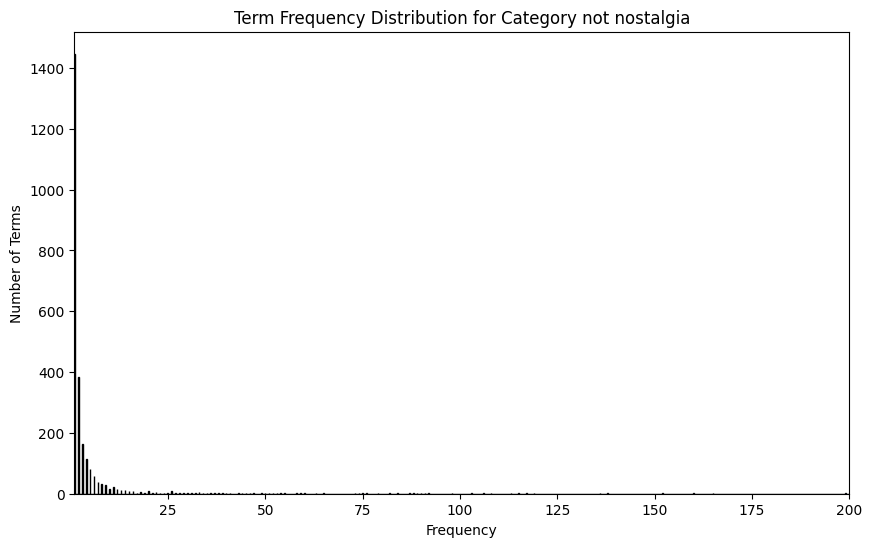

In [11]:
category_number=0 
word_counts_0 = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts_0, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

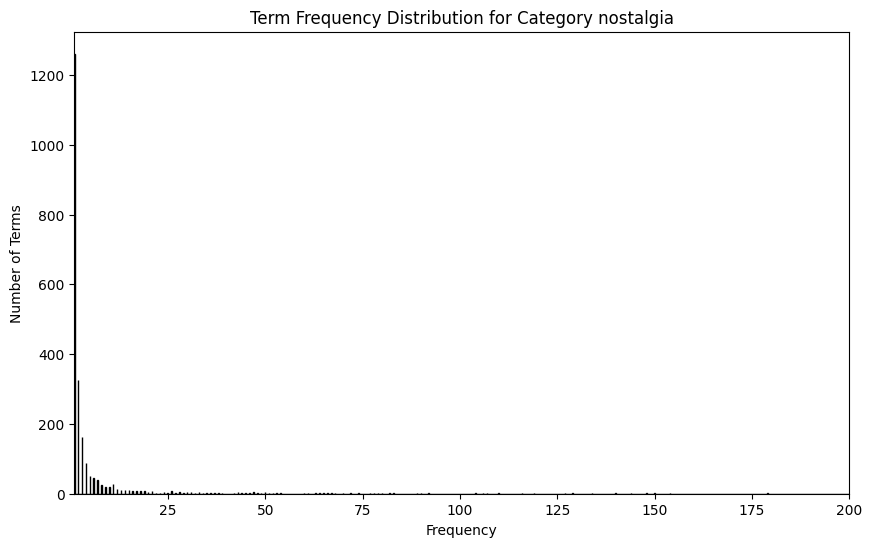

In [12]:
category_number=1 
word_counts_1 = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts_1, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()


In [13]:
filtered_words_to_remove_dfs={}
def wordsto_remove(term_document_df, top_percent=0.05, bottom_percent=0.01):
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    topn_words=sorted_words.head(bottom_n).index
    bottomn_words=sorted_words.tail(top_n).index
    print(topn_words)
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    return (words_to_remove)


for category in categories:
    filtered_words_to_remove_dfs[category] = wordsto_remove(term_document_dfs[category])
    
words_set_0 = set(filtered_words_to_remove_dfs[categories[0]])
words_set_1 = set(filtered_words_to_remove_dfs[categories[1]])


# 使用集合的交集操作找出共有詞彙
common_words = words_set_0 & words_set_1 
# 查看共有詞彙
print("\n共有詞彙:", common_words)
print("共有詞彙的數量:", len(common_words))
print("\n\n共有辭彙都是屬於生活中很常用的詞彙，並沒有什麼判別性")

Index(['00', 'montgomery', 'money', 'monday', 'moments', 'mocking', 'mock',
       'mitch', 'misunderstood', 'minute', 'minds', 'miller', 'monumental',
       'millennium', 'miles', 'microphone', 'miami', 'meta', 'mess', 'merle',
       'mendes', 'mended', 'melting', 'melt', 'melodica', 'milestone'],
      dtype='object')
Index(['yup', 'gospel', 'rose', 'round', 'rousing', 'goodness', 'routine',
       'row', 'ronnie', 'rpg', 'ruined', 'rules', 'running', 'sadder',
       'saddest', 'glimpses', 'safer', 'rubbish', 'grabbed', 'grace',
       'romanticism', 'rightly'],
      dtype='object')

共有詞彙: {'these', 'him', 'there', 'are', 'can', 'good', 'time', 'so', 'it', 'love', 'music', 'he', 'for', 'voice', 'thank', 'always', 'but', 'from', 'first', 'her', 'life', 'like', 'this', 'they', 'up', 'you', 'really', 'hear', 'she', 'those', 'sing', 'one', 'all', 'many', 'much', 'songs', 'who', 'how', 'what', 'still', 'years', 'best', 'now', 'out', 'with', 'old', 'in', 'my', 'heard', 'very', 'his', '

In [14]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)
print("ok")

ok


nostalgia
Database size (total no of transactions) : 750
Number of items : 2295
Minimum Transaction Size : 3
Average Transaction Size : 21.644
Maximum Transaction Size : 70
Standard Deviation Transaction Size : 13.110095245013795
Variance in Transaction Sizes : 172.1040694259012
Sparsity : 0.9905690631808279


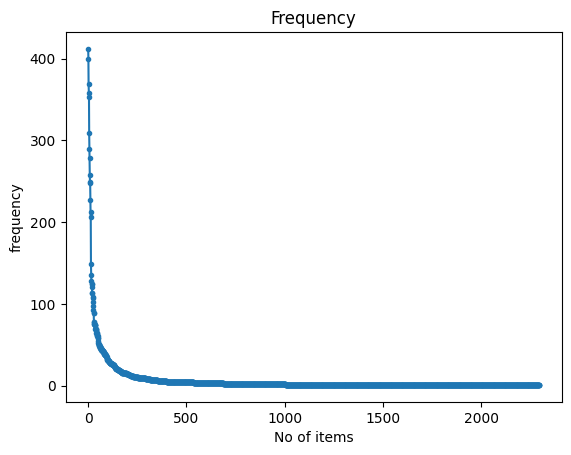

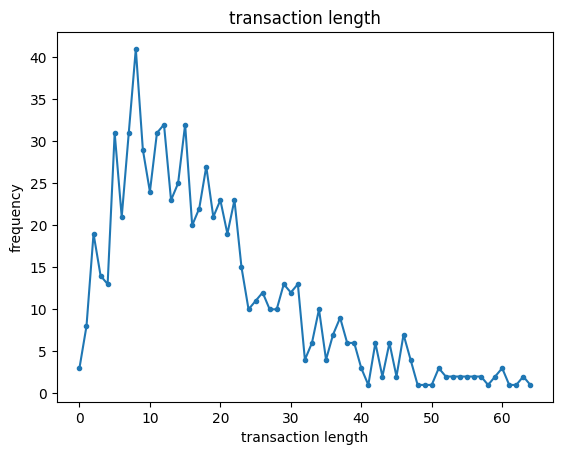

In [21]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
print("nostalgia")
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

not nostalgia
Database size (total no of transactions) : 748
Number of items : 2602
Minimum Transaction Size : 4
Average Transaction Size : 20.060160427807485
Maximum Transaction Size : 71
Standard Deviation Transaction Size : 10.370044579132406
Variance in Transaction Sizes : 107.68178417770905
Sparsity : 0.9922904840784752


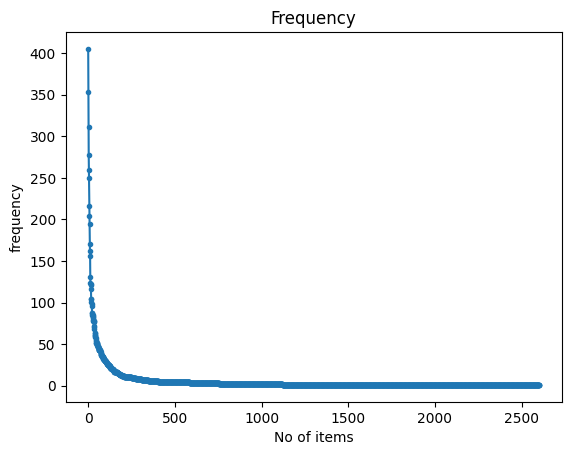

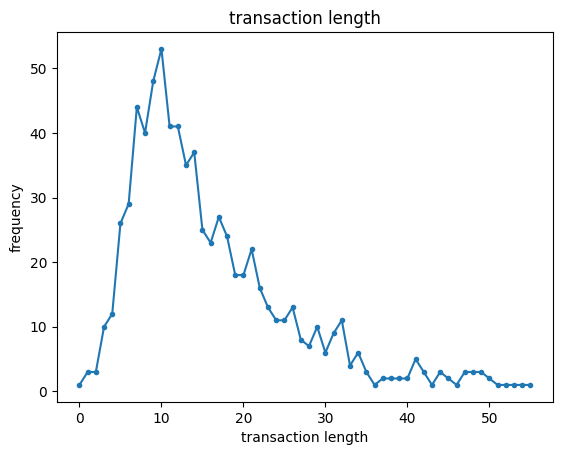

In [22]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
print("not nostalgia")
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [27]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=[30,20,10]
for s in minSup:
    obj1 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=s)
    obj1.mine()
    frequentPatternsDF_not_nostalgia= obj1.getPatternsAsDataFrame()
    print('minSup=',s)
    print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
    print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
minSup= 30
Total No of patterns: 609
Runtime: 0.06973505020141602
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
minSup= 20
Total No of patterns: 1493
Runtime: 0.14255023002624512
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
minSup= 10
Total No of patterns: 7543
Runtime: 0.283566951751709


In [28]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=[30,20,10]
for s in minSup:
    obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=s)
    obj1.mine()
    frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
    print('minSup=',s)
    print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
    print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
minSup= 30
Total No of patterns: 3067
Runtime: 0.1496901512145996
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
minSup= 20
Total No of patterns: 8696
Runtime: 0.2732713222503662
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
minSup= 10
Total No of patterns: 53761
Runtime: 1.156942367553711


In [29]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_not_nostalgia, frequentPatternsDF_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for x in dfs:
    for pattern in x['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(x) for x in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for x in dfs:
    filtered_df = x[x['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)#所有在獨特模式的DATAFRAME(超過最小支持度)




from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
df_tdm = count_vect.fit_transform(df['comment']) 
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df['tokenized_comment'] = df['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(df_tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)
print("augmented_df:")
augmented_df

augmented_df:


00  000  045  07  10  100  10m  11  11th  12  ...  out of song in  \
0      0    0    0   0   0    0    0   0     0   0  ...               0   
1      0    0    0   0   0    0    0   0     0   0  ...               0   
2      0    0    0   0   0    0    0   0     0   0  ...               0   
3      0    0    0   0   0    0    0   0     0   0  ...               0   
4      0    0    0   0   0    0    0   0     0   0  ...               0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...             ...   
1495   0    0    0   0   0    0    0   0     0   0  ...               0   
1496   0    0    0   0   0    0    0   0     0   0  ...               0   
1497   0    0    0   0   0    0    0   0     0   0  ...               0   
1498   0    0    0   0   0    0    0   0     0   0  ...               0   
1499   0    0    0   0   0    0    0   0     0   0  ...               0   

      old on in of was the  old on years and the was  old on years this was  \
0                        0                         0                      0   
1                        0                         0                      0   
2                        0                         0                      0   
3                        0                         0                      0   
4                        0                         0                      0   
...                    ...                       ...                    ...   
1495                     0                         0                      0   
1496                     0                         0                      0   
1497                     0                         0                      0   
1498                     0                         0                      0   
1499                     0                         0                      0   

      out of song in this  old on of and years  old on of this years  \
0                       0                    0                     0   
1                       0                    0                     0   
2                       0                    0                     0   
3                       0                    0                     0   
4                       0                    0                     0   
...                   ...                  ...                   ...   
1495                    0                    0                     0   
1496                    0                    0                     0   
1497                    0                    0                     0   
1498                    0                    0                     0   
1499                    0                    0                     0   

      old on of this the  out of song in the  rock  
0                      0                   0     0  
1                      0                   0     0  
2                      0                   0     0  
3                      0                   0     0  
4                      0                   0     0  
...                  ...                 ...   ...  
1495                   0                   0     0  
1496                   0                   0     0  
1497                   0                   0     0  
1498                   0                   0     0  
1499                   0                   0     0  

[1498 rows x 59398 columns]

In [30]:
# Answer Here
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
from PAMI.periodicFrequentPattern.maximal.MaxPFGrowth import MaxPFGrowth
from PAMI.frequentPattern.topk.FAE import FAE 
import time

fae_topk_patterns = {}
maxfpgrowth_patterns = {}

k_values = [100, 300,500]
for k in k_values:#看前K個模式
    start_time = time.time()  # 計時
    fae_topk = FAE(iFile='td_freq_db_not nostalgia.csv', k=k)  # 參考前面的
    fae_topk.mine()  #挖掘
    fae_topk_patterns[k] = fae_topk.getPatternsAsDataFrame()  # 獲取結果
    runtime = time.time() - start_time  # 計算時間
    print(f"FAE Top-K with k={k} took {runtime:.2f} seconds")
    print(f"Patterns found for k={k}:", fae_topk_patterns[k])
    print("k=",k)
    print("\n")


 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-K with k=100 took 0.10 seconds
Patterns found for k=100:      Patterns  Support
0         the      405
1        this      353
2         and      311
3          to      277
4          of      260
..        ...      ...
95  this love       72
96      is it       72
97    is that       72
98      songs       71
99      is in       69

[100 rows x 2 columns]
k= 100


 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-K with k=300 took 0.27 seconds
Patterns found for k=300:            Patterns  Support
0               the      405
1              this      353
2               and      311
3                to      277
4                of      260
..              ...      ...
295        is music       41
296          in one       41
297      song to it       40
298        song for       40
299  song beautiful       40

[300 rows x 2 columns]
k= 300


 TopK frequent patterns were succe

original data with fit_transform


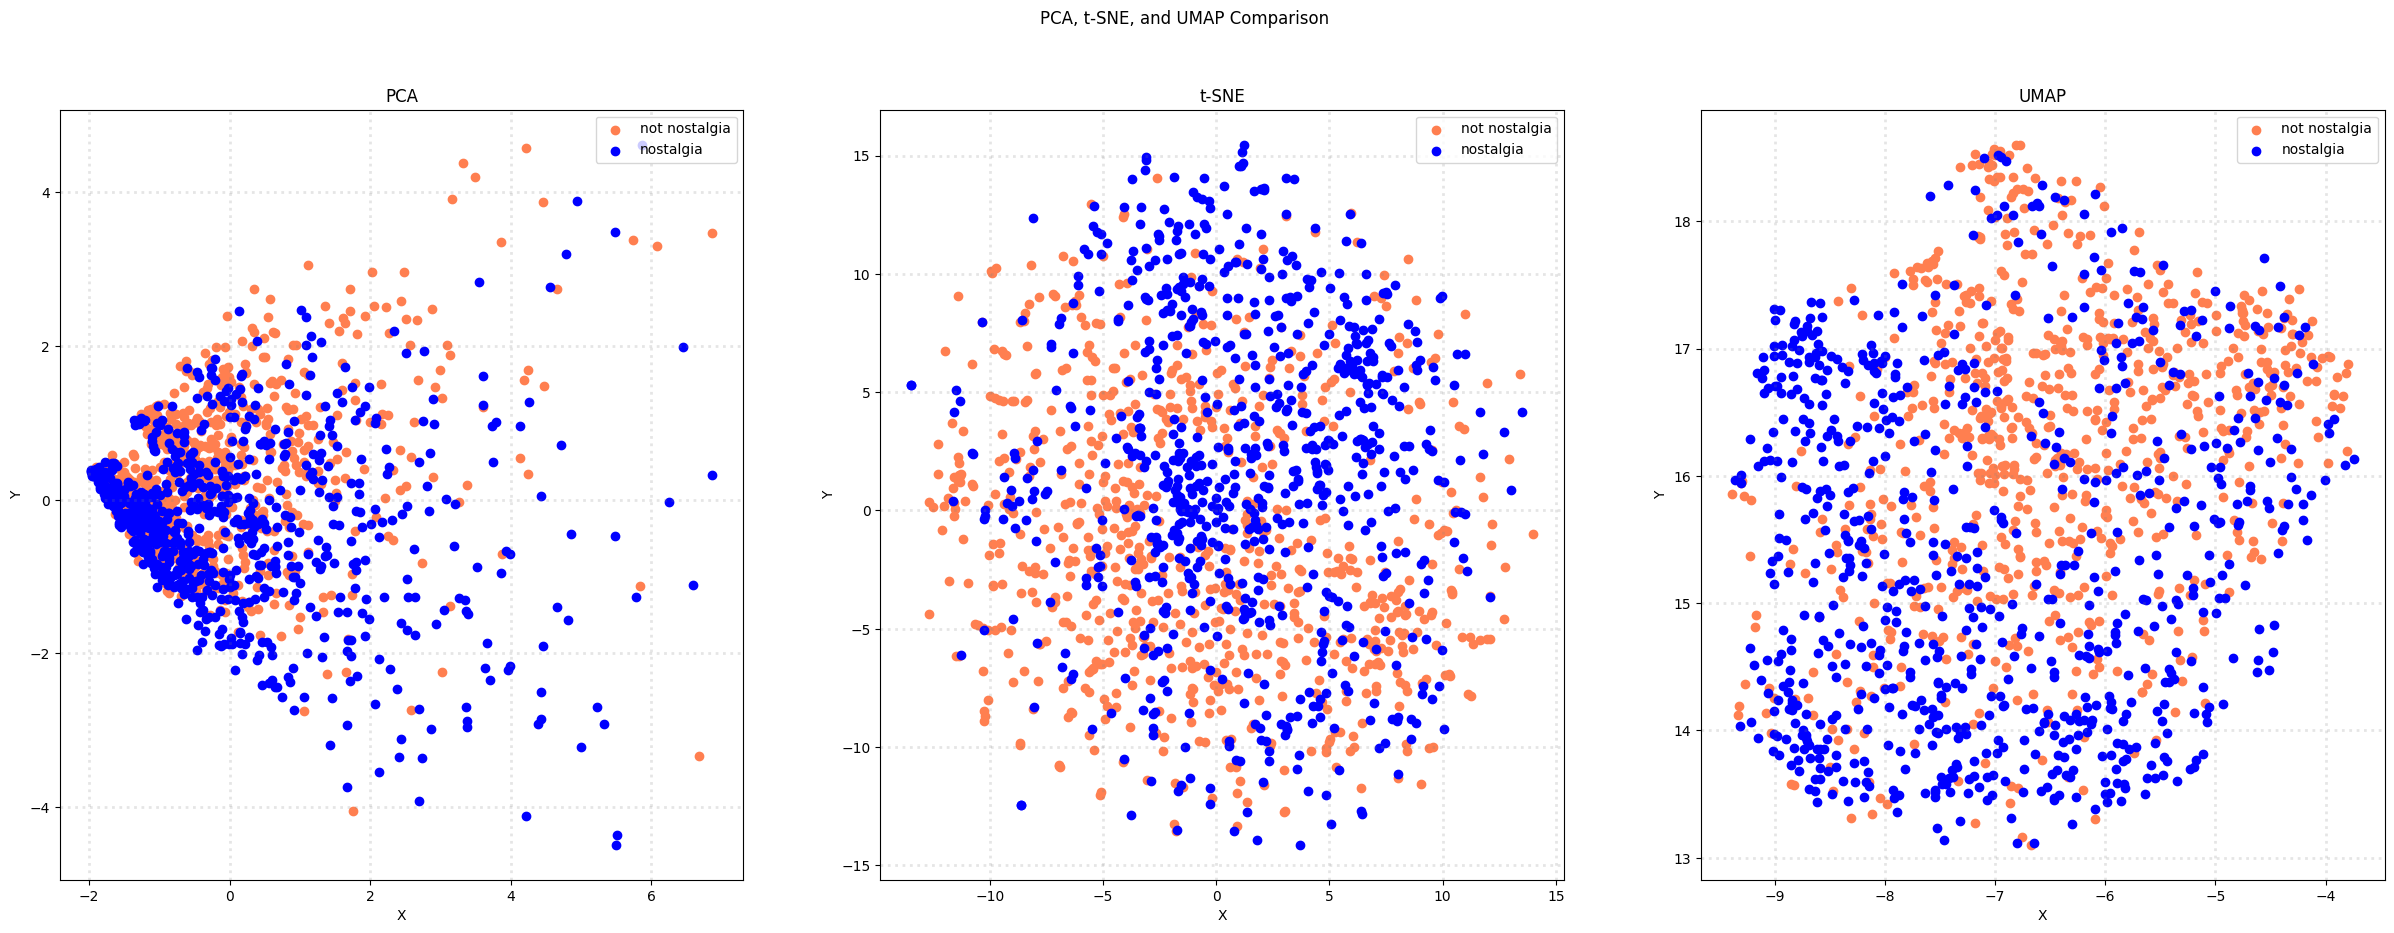

In [31]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
print("original data with fit_transform")
#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
df_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
df_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
df_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = ['not nostalgia','nostalgia']

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, df_reduced, title):
    for c, category in zip(col, categories):
        xs = df_reduced[df['sentiment'] == category].T[0]
        ys = df_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], df_pca_tdm, 'PCA')
plot_scatter(axes[1], df_tsne_tdm, 't-SNE')
plot_scatter(axes[2], df_umap_tdm, 'UMAP')

plt.show()

augmented_df


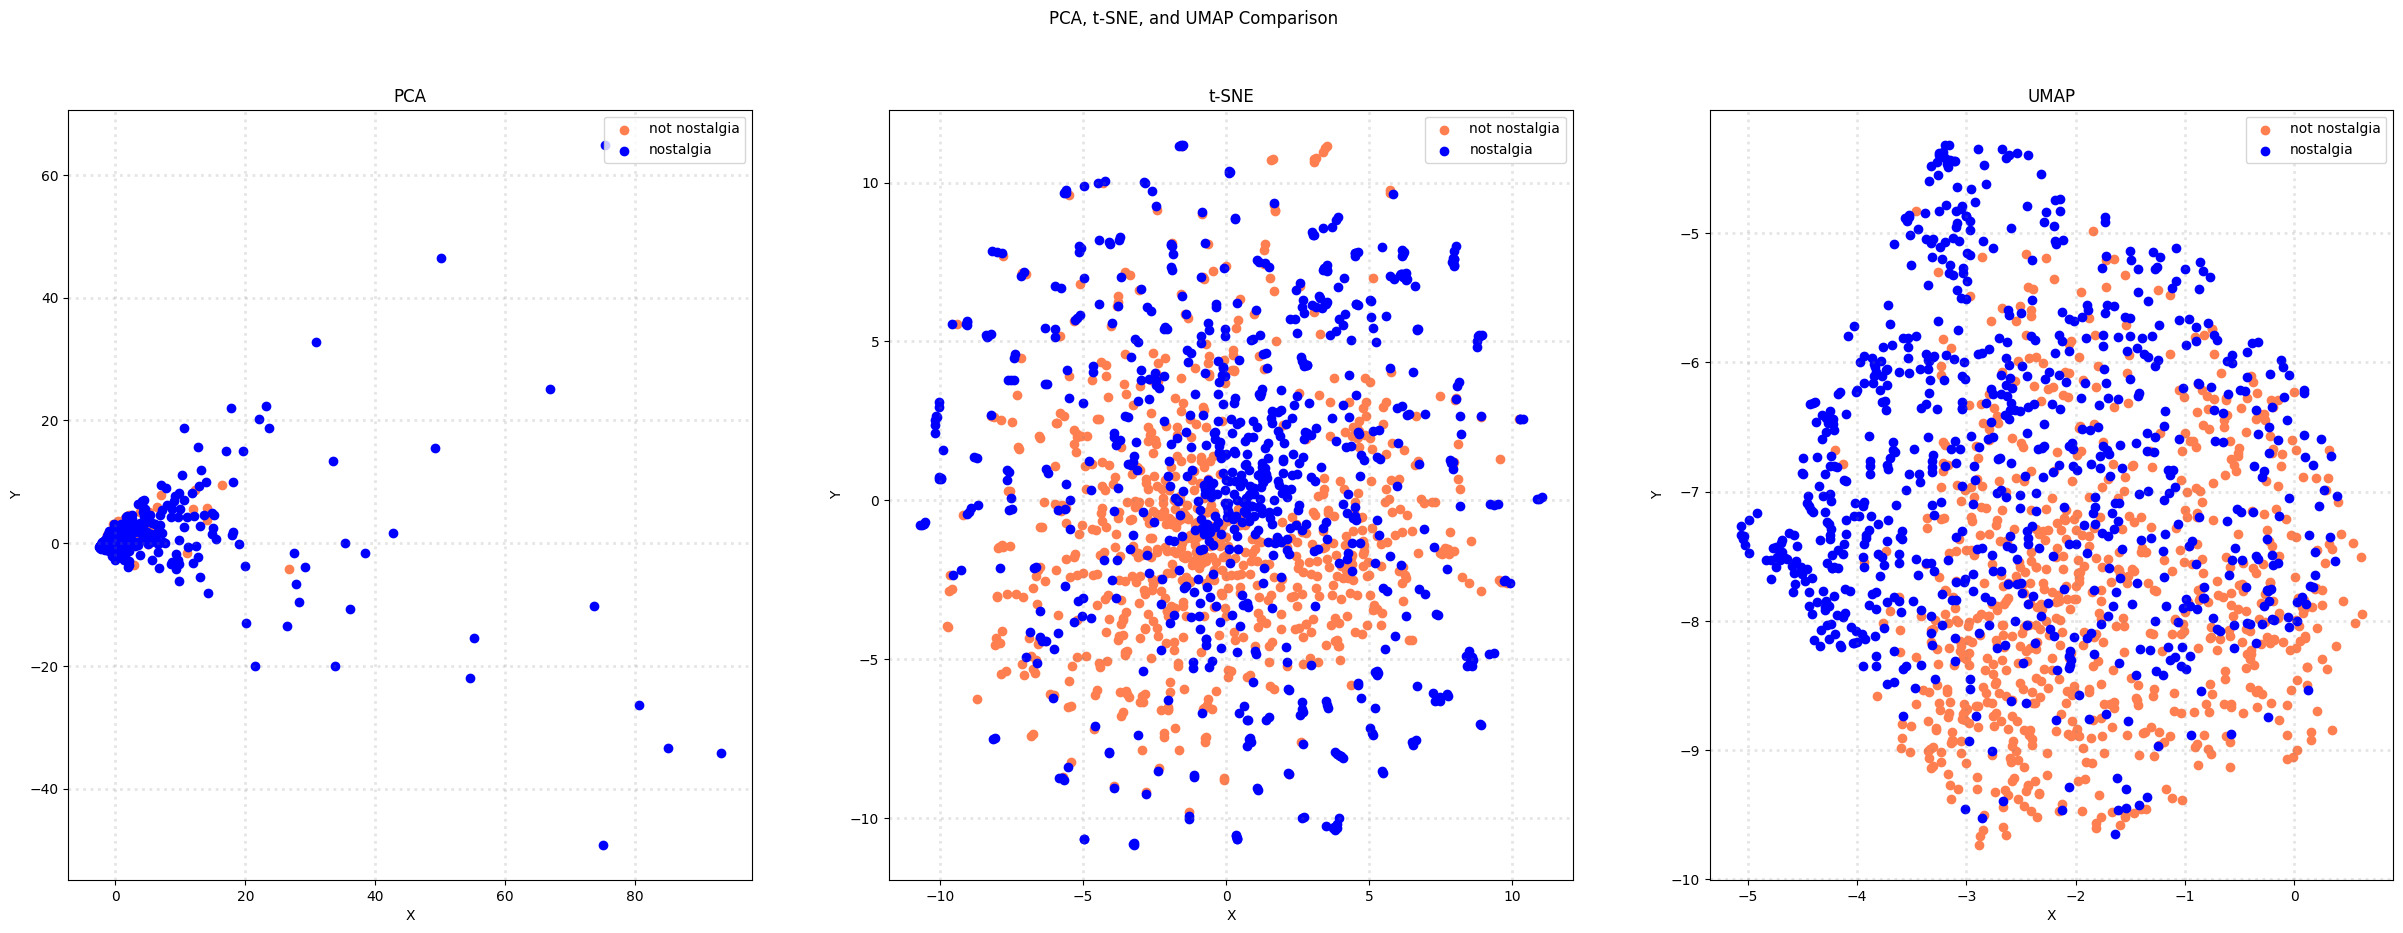

In [32]:
print("augmented_df")
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

col = ['coral', 'blue', 'black', 'orange']
categories = ['not nostalgia','nostalgia']

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

tdm_df comparison


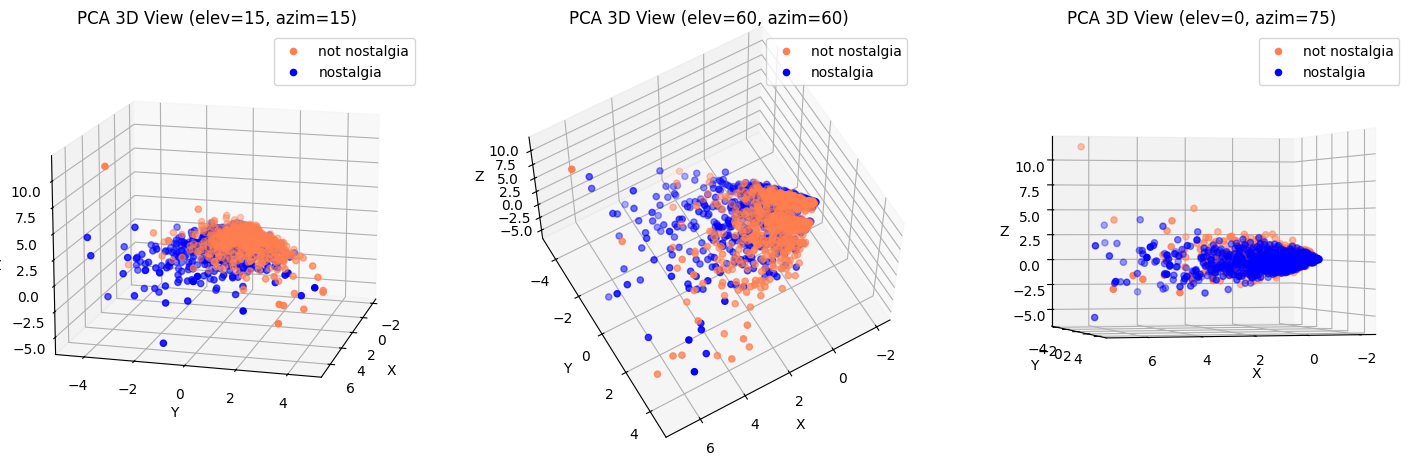

In [33]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
print("tdm_df comparison")
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(tdm_df.values) 


angles =  [(15, 15),(60, 60),(0, 75) ]


fig = plt.figure(figsize=(18, 6))
for i, angle in enumerate(angles):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    for c, category in zip(col, categories):
        xs = X_pca_3d[df['sentiment'] == category, 0]
        ys = X_pca_3d[df['sentiment'] == category, 1]
        zs = X_pca_3d[df['sentiment'] == category, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.view_init(elev=angle[0], azim=angle[1])  
    ax.set_title(f'PCA 3D View (elev={angle[0]}, azim={angle[1]})')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

plt.show()


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vect = TfidfVectorizer()

#進行 TF-IDF 轉換
tfidf_matrix = tfidf_vect.fit_transform(df['comment'])  # 生成 TF-IDF 特徵矩陣
tfidf_features = tfidf_vect.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_features)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

target_names = ['not nostalgia', 'nostalgia'] 
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['sentiment'], test_size=0.3, random_state=66)
clf = BernoulliNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Classifier: BernoulliNB")
print("Using TF-IDF")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

Classifier: BernoulliNB
Using TF-IDF
Accuracy: 0.9066666666666666
Classification Report:
               precision    recall  f1-score   support

not nostalgia       0.89      0.94      0.91       232
    nostalgia       0.93      0.88      0.90       218

     accuracy                           0.91       450
    macro avg       0.91      0.91      0.91       450
 weighted avg       0.91      0.91      0.91       450



In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 假設 tfidf_matrix 是您的 TF-IDF 特徵矩陣
# 將數據分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['sentiment'], test_size=0.3, random_state=66)

# 使用 Multinomial Naive Bayes 建立模型
clf = MultinomialNB()
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

# 評估模型
print("Classifier: MultinomialNB")
print("Using TF-IDF")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['not nostalgia', 'nostalgia']))


Classifier: MultinomialNB
Using TF-IDF
Accuracy: 0.8911111111111111
Classification Report:
               precision    recall  f1-score   support

not nostalgia       0.85      0.95      0.90       232
    nostalgia       0.94      0.83      0.88       218

     accuracy                           0.89       450
    macro avg       0.90      0.89      0.89       450
 weighted avg       0.90      0.89      0.89       450



In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vect = TfidfVectorizer()

#進行 TF-IDF 轉換
tfidf_matrix = tfidf_vect.fit_transform(df['comment'])  # 生成 TF-IDF 特徵矩陣
tfidf_features = tfidf_vect.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_features)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

target_names = ['not nostalgia', 'nostalgia'] 
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['sentiment'], test_size=0.3, random_state=66)
clf = BernoulliNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Classifier: BernoulliNB")
print("Using TF-IDF")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

Classifier: BernoulliNB
Using TF-IDF
Accuracy: 0.5933333333333334
Classification Report:
               precision    recall  f1-score   support

not nostalgia       0.85      0.26      0.40       232
    nostalgia       0.55      0.95      0.69       218

     accuracy                           0.59       450
    macro avg       0.70      0.60      0.54       450
 weighted avg       0.70      0.59      0.54       450



In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 假設 tfidf_matrix 是您的 TF-IDF 特徵矩陣
# 將數據分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['sentiment'], test_size=0.3, random_state=66)

# 使用 Multinomial Naive Bayes 建立模型
clf = MultinomialNB()
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

# 評估模型
print("Classifier: MultinomialNB")
print("Using TF-IDF")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['not nostalgia', 'nostalgia']))

Classifier: MultinomialNB
Using TF-IDF
Accuracy: 0.7733333333333333
Classification Report:
               precision    recall  f1-score   support

not nostalgia       0.93      0.60      0.73       232
    nostalgia       0.69      0.95      0.80       218

     accuracy                           0.77       450
    macro avg       0.81      0.78      0.77       450
 weighted avg       0.82      0.77      0.77       450



In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vect = TfidfVectorizer()

#進行 TF-IDF 轉換
tfidf_matrix = tfidf_vect.fit_transform(df['comment'])  # 生成 TF-IDF 特徵矩陣
tfidf_features = tfidf_vect.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_features)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

target_names = ['not nostalgia', 'nostalgia'] 
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['sentiment'], test_size=0.3, random_state=66)
clf = BernoulliNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Classifier: BernoulliNB")
print("Using TF-IDF")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

Classifier: BernoulliNB
Using TF-IDF
Accuracy: 0.9066666666666666
Classification Report:
               precision    recall  f1-score   support

not nostalgia       0.89      0.94      0.91       232
    nostalgia       0.93      0.88      0.90       218

     accuracy                           0.91       450
    macro avg       0.91      0.91      0.91       450
 weighted avg       0.91      0.91      0.91       450



In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 假設 tfidf_matrix 是您的 TF-IDF 特徵矩陣
# 將數據分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['sentiment'], test_size=0.3, random_state=66)

# 使用 Multinomial Naive Bayes 建立模型
clf = MultinomialNB()
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

# 評估模型
print("Classifier: MultinomialNB")
print("Using TF-IDF")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['not nostalgia', 'nostalgia']))

Classifier: MultinomialNB
Using TF-IDF
Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

not nostalgia       0.87      0.94      0.91       232
    nostalgia       0.93      0.85      0.89       218

     accuracy                           0.90       450
    macro avg       0.90      0.90      0.90       450
 weighted avg       0.90      0.90      0.90       450



In [53]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

# 初始化結果數據表格
results = []

# 設置分類器
classifiers = {
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB()
}

# 定義數據集及名稱
datasets = {
    'tfidf': tfidf_matrix,
    'tdm': tdm_df,
    'augmented': augmented_df
}

target_names = ['not nostalgia', 'nostalgia'] 

# 迭代每個數據集和分類器
for dataset_name, dataset in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(dataset, df['sentiment'], test_size=0.3, random_state=66)
    
    for clf_name, clf in classifiers.items():
        if clf_name == 'BernoulliNB' and dataset_name == 'tfidf':
            X_train = X_train.toarray()
            X_test = X_test.toarray()
        
        # 訓練分類器
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # 紀錄結果
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
        
        results.append({
            'Dataset': dataset_name,
            'Classifier': clf_name,
            'Accuracy': accuracy,
        })

# 將結果轉為 DataFrame 並展示
results_df = pd.DataFrame(results)
print("Comparison of Different Datasets and Classifiers:")
print(results_df)
print("結果:\n augmentd_df的效果非常不好，說明額外的交易資訊造成反效果\n tdm_df的效果最佳，說明詞頻表很好的提供資訊\n tfidf效果則介於中間")
print("雖然MultinomialNB適用於tf-idf資料，但在此dataset的結果上卻略遜於BernoulliNB，可能是因為BernoulliNB更適合用在二元分類問題上")

Comparison of Different Datasets and Classifiers:
     Dataset     Classifier  Accuracy
0      tfidf  MultinomialNB  0.891111
1      tfidf    BernoulliNB  0.906667
2        tdm  MultinomialNB  0.900000
3        tdm    BernoulliNB  0.906667
4  augmented  MultinomialNB  0.773333
5  augmented    BernoulliNB  0.593333
結果:
 augmentd_df的效果非常不好，說明額外的交易資訊造成反效果
 tdm_df的效果最佳，說明詞頻表很好的提供資訊
 tfidf效果則介於中間
雖然MultinomialNB適用於tf-idf資料，但在此dataset的結果上卻略遜於BernoulliNB，可能是因為BernoulliNB更適合用在二元分類問題上


In [52]:
print("在CountVectorizer的部分，可以將max_df設為1，這樣可以篩選掉在所有文檔都出現的詞彙，可以去掉大量常見的詞彙使整體效率變快")

在CountVectorizer的部分，可以將max_df設為1，這樣可以篩選掉在所有文檔都出現的詞彙，可以去掉大量常見的詞彙使整體效率變快
